In [1]:
from net2rank.p4c_tools import make_network, network_cluster, function_enrichment
from net2rank.p4c_tools import parse_enrichment_results,select_proteins_by_enrichment
from net2rank.p4c_tools import load_protein_data, make_network_plot, make_network_plot_with_pie_charts

import py4cytoscape as p4c
import pandas as pd

from sklearn.metrics import roc_curve

p4c.import_visual_styles('../data/Revelen_style.xml')

['Revelen']

In [2]:
predictions_file = '../results/test_results/atopic_dermatitis/atopic_dermatitis_test_prediction_results.tsv'
df_predictions = pd.read_csv(predictions_file, sep='\t')
fpr, tpr, thresholds = roc_curve(df_predictions['true_label'], df_predictions['predicted_score'])
threshold = thresholds[fpr <= 0.05][-1]
df_category = pd.read_csv('../results/test_results/atopic_dermatitis/atopic_dermatitis_whole_prediction_results.tsv', sep='\t')
df_protein_category = df_category[df_category['predicted_score'] >= threshold]

In [ ]:
suid = make_network(
    proteins=df_protein_category['protein'].tolist(),
    network_name='atopic_dermatitis_main_network',
    cutoff=0.7)



In [ ]:
cluster_cmd = ('cluster mcl '
            'network=current '
            'inflation_parameter=4')
cluster_result = p4c.commands_post(cluster_cmd)  

In [26]:
def pick_cluster_proteins(clusters, idx):
    """
    Select proteins from a specific cluster index.
    """
    return [node_dict['name'] for node_dict in clusters['clusters'][idx]['nodes']]

/Users/pst325/Documents/zs_work/net2rank/.venv/lib/python3.11/site-packages/py4cytoscape/tables.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


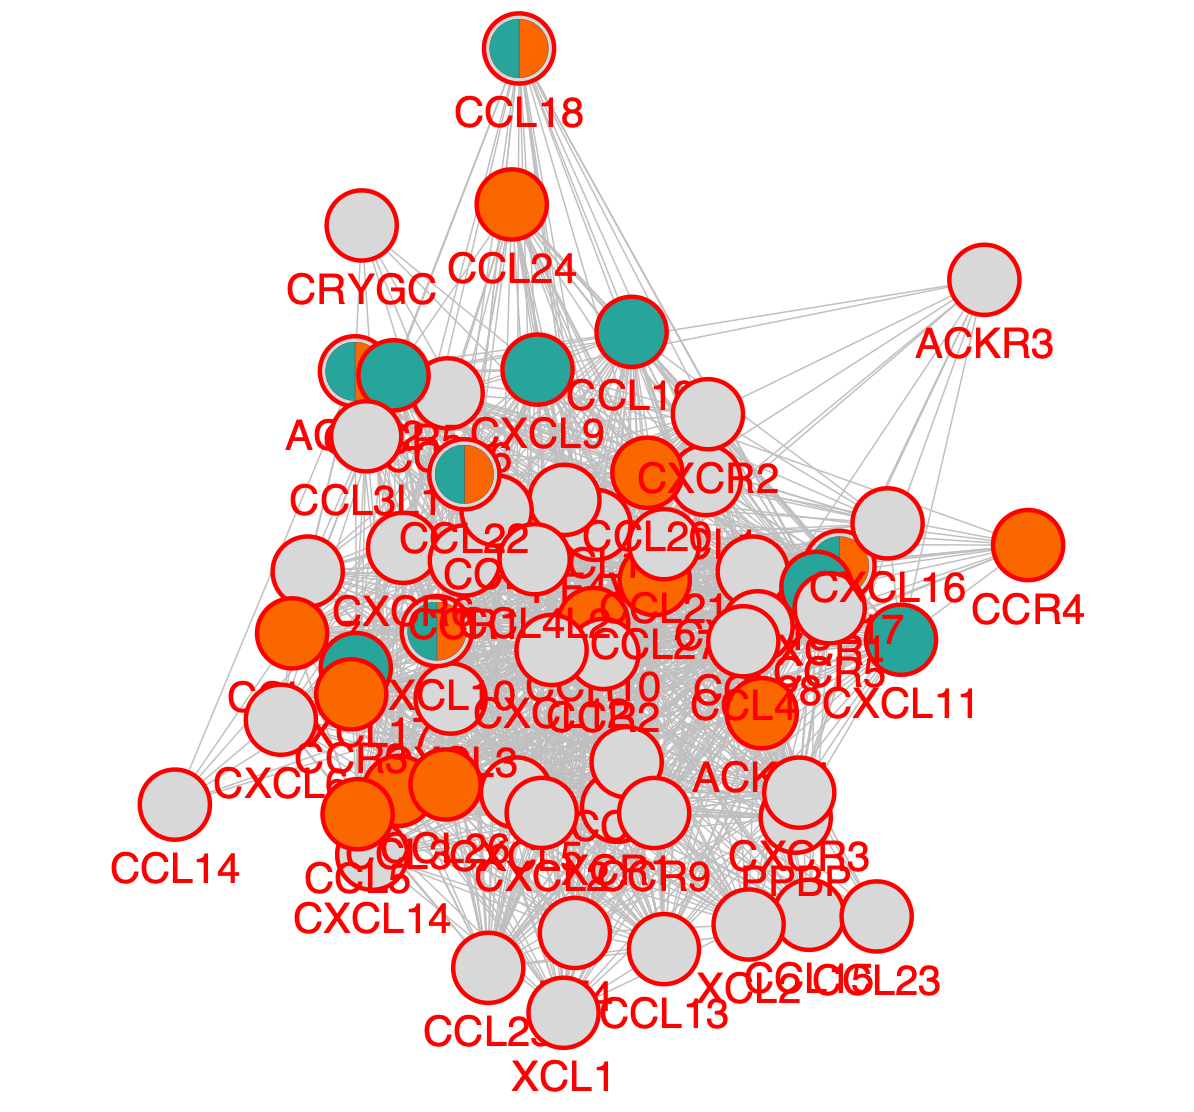

In [28]:
proteins = pick_cluster_proteins(cluster_result[0], 1)
suid = make_network(
        proteins=proteins,
        network_name='test_module_network_cluster1',)
suid = make_network_plot_with_pie_charts(
    df_protein_category=df_protein_category,
    selected_proteins=proteins,
    suid=suid
)
p4c.layout_network('force-directed', network=suid)
p4c.notebook_export_show_image()

/Users/pst325/Documents/zs_work/net2rank/.venv/lib/python3.11/site-packages/py4cytoscape/tables.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


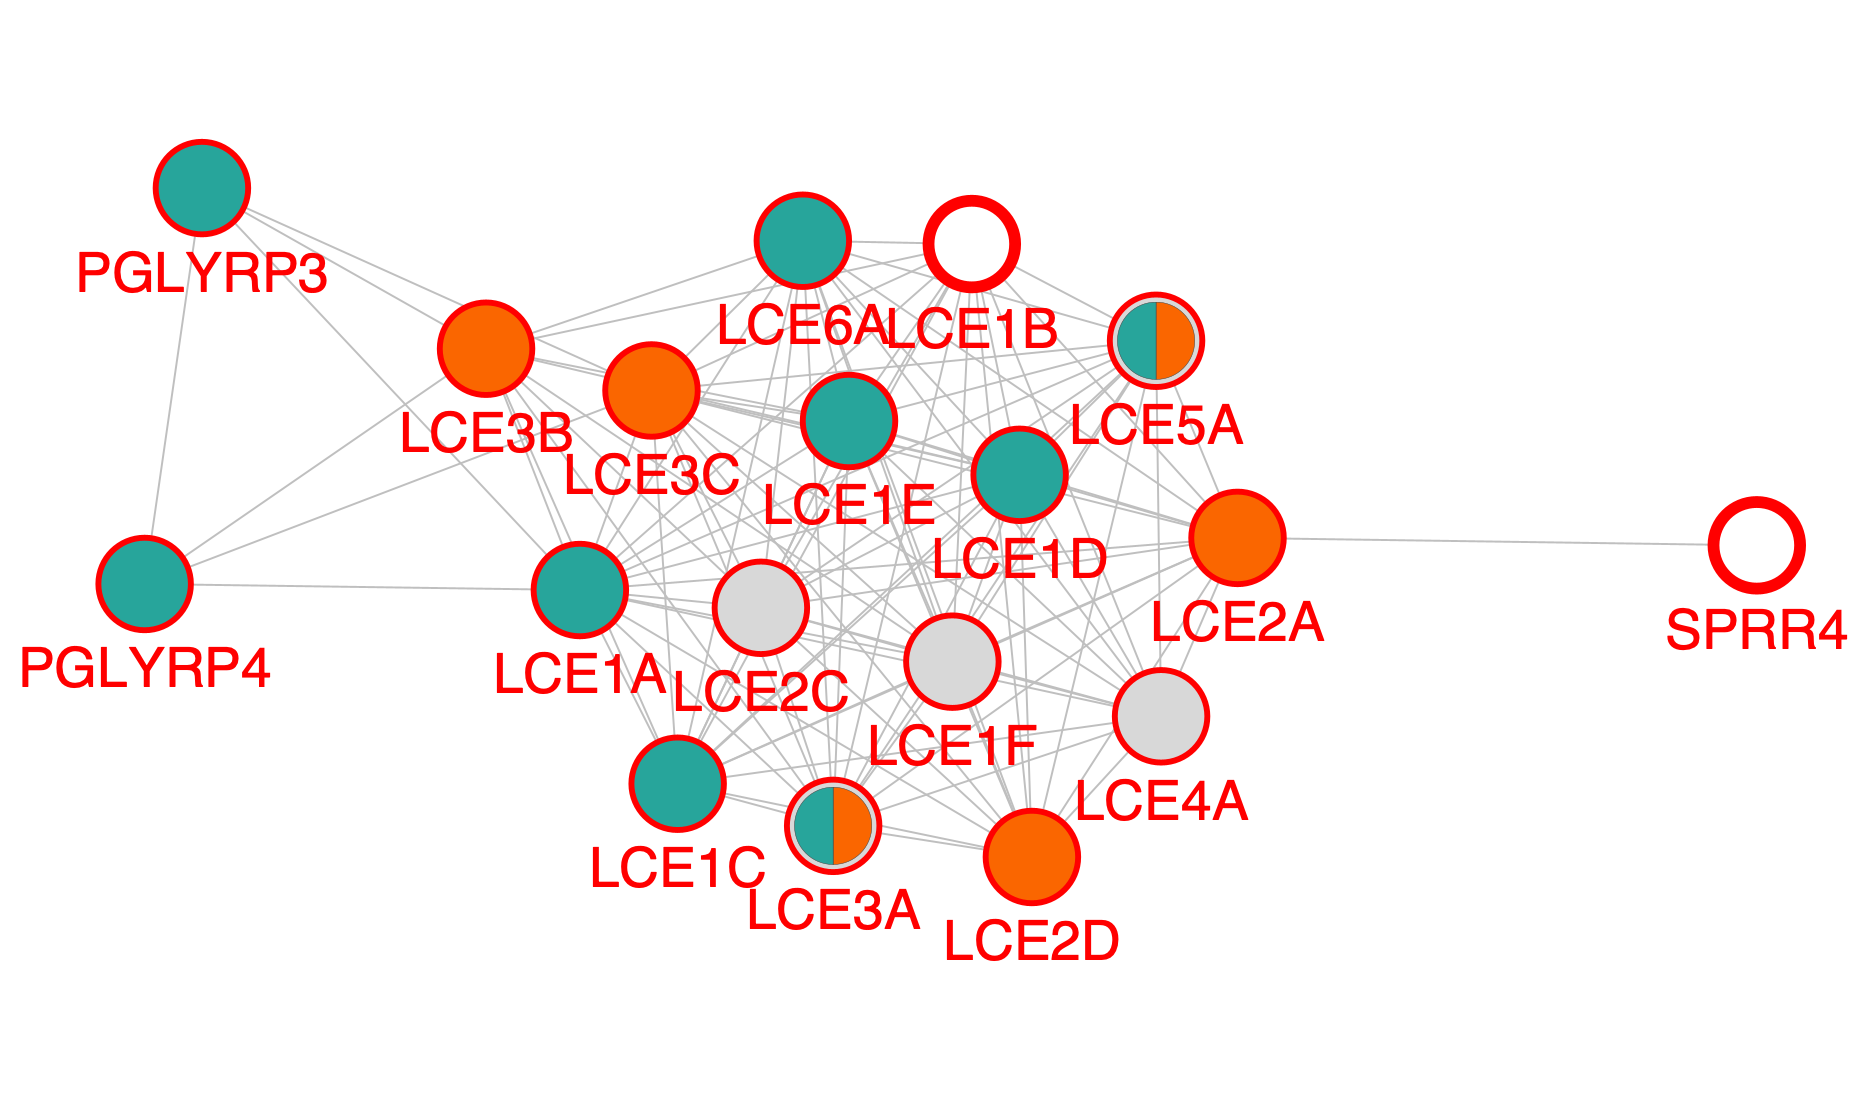

In [38]:
proteins = pick_cluster_proteins(cluster_result[0], 7)
suid = make_network(
        proteins=proteins,
        network_name='test_module_network_cluster1',)
suid = make_network_plot_with_pie_charts(
    df_protein_category=df_protein_category,
    selected_proteins=proteins,
    suid=suid
)
p4c.layout_network('force-directed', network=suid)
p4c.notebook_export_show_image()

/Users/pst325/Documents/zs_work/net2rank/.venv/lib/python3.11/site-packages/py4cytoscape/tables.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


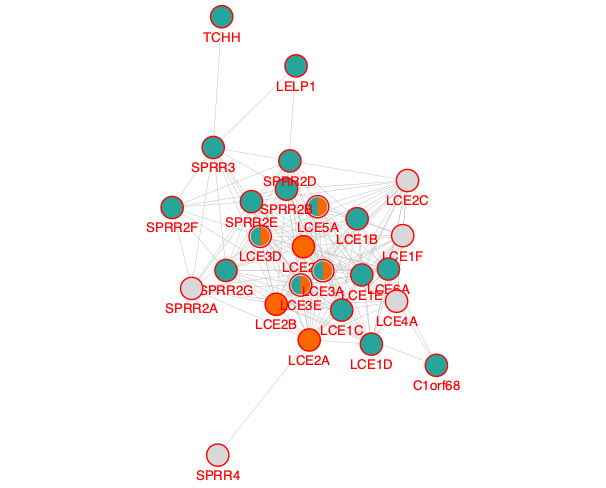

In [18]:
proteins = pick_cluster_proteins(cluster_result, 2)
suid = make_network(
        proteins=proteins,
        network_name='test_module_network_cluster1',)
suid = make_network_plot_with_pie_charts(
    df_protein_category=df_protein_category,
    selected_proteins=proteins,
    suid=suid
)
p4c.layout_network('force-directed', network=suid)
p4c.notebook_export_show_image()

/Users/pst325/Documents/zs_work/net2rank/.venv/lib/python3.11/site-packages/py4cytoscape/tables.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


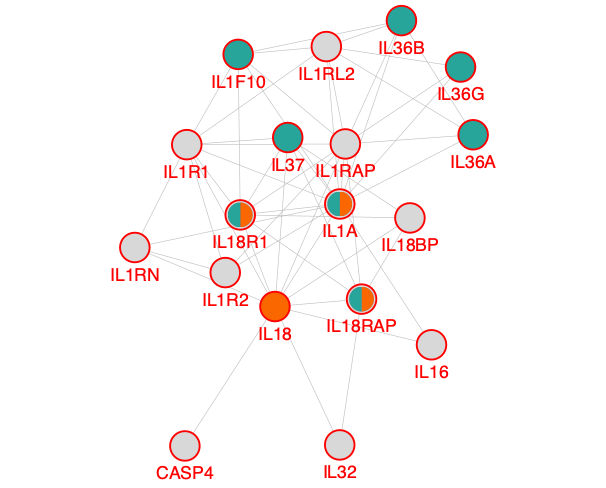

In [20]:
proteins = pick_cluster_proteins(cluster_result, 3)
suid = make_network(
        proteins=pick_cluster_proteins(cluster_result, 3),
        network_name='test_module_network_cluster1',)
suid = make_network_plot_with_pie_charts(
    df_protein_category=df_protein_category,
    selected_proteins=proteins,
    suid=suid
)
p4c.layout_network('force-directed', network=suid)
p4c.notebook_export_show_image()

In [15]:
len(cluster_proteins[0])

90

In [10]:
parse_enrichment_results(enrichment_results[0],category='Process')

,term,description,fdr,num_genes,num_genes_background,category
0,GO:0070098,Chemokine-mediated signaling pathway,4.020000e-91,53,82,Process
1,GO:0060326,Cell chemotaxis,4.070000e-84,58,210,Process
2,GO:0006955,Immune response,6.970000e-72,77,1321,Process
3,GO:0019221,Cytokine-mediated signaling pathway,6.810000e-66,55,369,Process
4,GO:0002376,Immune system process,1.200000e-65,82,2121,Process
...,...,...,...,...,...,...
286,GO:0046330,Positive regulation of JNK cascade,4.290000e-02,4,96,Process
287,GO:0051093,Negative regulation of developmental process,4.370000e-02,12,933,Process
288,GO:0097305,Response to alcohol,4.370000e-02,6,252,Process
289,GO:0044403,Biological process involved in symbiotic inter...,4.780000e-02,6,257,Process


/Users/pst325/Documents/zs_work/net2rank/.venv/lib/python3.11/site-packages/py4cytoscape/tables.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


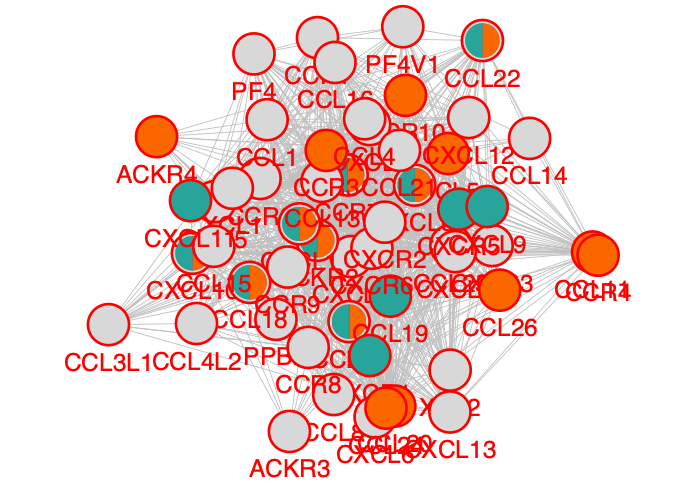

In [12]:
suid = make_network_plot(
    df_protein_category=df_protein_category,
    enrichment_results=enrichment_results[0],
    selected_term='GO:0070098', # Cytokine-mediated signaling pathway
    disease_name='atopic_dermatitis',
)
p4c.layout_network('force-directed', network=suid)
p4c.notebook_export_show_image()

In [16]:
parse_enrichment_results(enrichment_results[1],category='Process')

,term,description,fdr,num_genes,num_genes_background,category
0,GO:0019221,Cytokine-mediated signaling pathway,1.810000e-63,49,369,Process
1,GO:0071345,Cellular response to cytokine stimulus,4.510000e-58,53,711,Process
2,GO:0006955,Immune response,4.080000e-48,55,1321,Process
3,GO:0002376,Immune system process,2.710000e-47,61,2121,Process
4,GO:0071310,Cellular response to organic substance,5.110000e-37,54,2019,Process
...,...,...,...,...,...,...
389,GO:0150078,Positive regulation of neuroinflammatory response,4.410000e-02,2,15,Process
390,GO:0070228,Regulation of lymphocyte apoptotic process,4.540000e-02,3,64,Process
391,GO:0033674,Positive regulation of kinase activity,4.650000e-02,7,494,Process
392,GO:0060334,Regulation of interferon-gamma-mediated signal...,4.860000e-02,2,16,Process


/Users/pst325/Documents/zs_work/net2rank/.venv/lib/python3.11/site-packages/py4cytoscape/tables.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


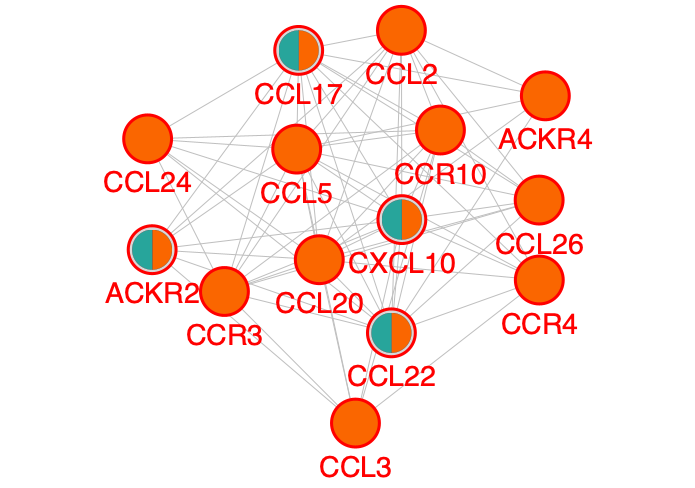

In [22]:
suid = make_network_plot(
    df_protein_category=df_protein_category,
    enrichment_results=enrichment_results[0],
    selected_term='GO:0070098', # Cytokine-mediated signaling pathway
    disease_name='atopic_dermatitis',
)
p4c.layout_network('force-directed', network=suid)
p4c.notebook_export_show_image()